In [13]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import warnings

# Suppress specific warnings (e.g., FutureWarning from seaborn)
warnings.filterwarnings('ignore', category=FutureWarning)

# Set plot style
sns.set(style="whitegrid")

In [2]:
# --- 1. Load and Explore Data ---
print("--- 1. Load and Explore Data ---")
try:
    df = pd.read_csv('Jamboree_Admission.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Jamboree_Admission.csv not found in the current directory.")
    exit()

print("\nDataset Info:")
df.info()

print("\nDataset Head:")
print(df.head())

print("\nDataset Description:")
print(df.describe())

print("\nChecking for Missing Values:")
print(df.isnull().sum())
# No missing values found initially.

# Drop the unique identifier column 'Serial No.'
if 'Serial No.' in df.columns:
    df = df.drop('Serial No.', axis=1)
    print("\n'Serial No.' column dropped.")
else:
    print("\n'Serial No.' column not found.")

# Rename columns for easier access (remove spaces and '.')
df.columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']
print("\nColumns renamed:")
print(df.columns)

print("\nUpdated Dataset Info:")
df.info() # Check data types again after renaming

# Convert University_Rating and Research to categorical type for specific analyses if needed
# Although they are numerical, treating them as ordered categorical might be useful sometimes.
# For regression, we'll keep them numerical for now.
# df['University_Rating'] = df['University_Rating'].astype('category')
# df['Research'] = df['Research'].astype('category')


--- 1. Load and Explore Data ---
Dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB

Dataset Head:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.

In [3]:
# --- 2. Exploratory Data Analysis (EDA) ---
print("\n--- 2. Exploratory Data Analysis (EDA) ---")

# Univariate Analysis
print("\nPerforming Univariate Analysis...")
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(df['GRE_Score'], kde=True)
plt.title('GRE Score Distribution')

plt.subplot(3, 3, 2)
sns.histplot(df['TOEFL_Score'], kde=True)
plt.title('TOEFL Score Distribution')

plt.subplot(3, 3, 3)
sns.countplot(x='University_Rating', data=df)
plt.title('University Rating Distribution')

plt.subplot(3, 3, 4)
sns.histplot(df['SOP'], kde=True)
plt.title('SOP Strength Distribution')

plt.subplot(3, 3, 5)
sns.histplot(df['LOR'], kde=True)
plt.title('LOR Strength Distribution')

plt.subplot(3, 3, 6)
sns.histplot(df['CGPA'], kde=True)
plt.title('CGPA Distribution')

plt.subplot(3, 3, 7)
sns.countplot(x='Research', data=df)
plt.title('Research Experience Distribution')

plt.subplot(3, 3, 8)
sns.histplot(df['Chance_of_Admit'], kde=True)
plt.title('Chance of Admit Distribution')

plt.tight_layout()
plt.savefig('univariate_plots.png')
print("Univariate plots saved to univariate_plots.png")
plt.close()


--- 2. Exploratory Data Analysis (EDA) ---

Performing Univariate Analysis...
Univariate plots saved to univariate_plots.png



Performing Bivariate Analysis...


Text(0.5, 1.0, 'CGPA vs Chance of Admit')

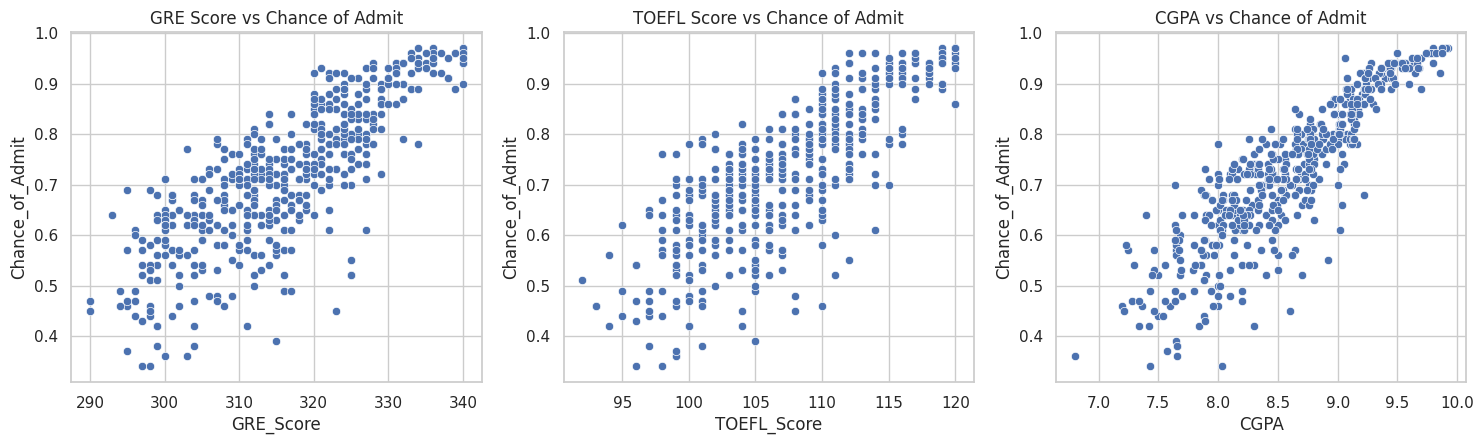

In [4]:
# Bivariate Analysis
print("\nPerforming Bivariate Analysis...")
# Scatter plots against Chance_of_Admit
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='GRE_Score', y='Chance_of_Admit', data=df)
plt.title('GRE Score vs Chance of Admit')

plt.subplot(2, 3, 2)
sns.scatterplot(x='TOEFL_Score', y='Chance_of_Admit', data=df)
plt.title('TOEFL Score vs Chance of Admit')

plt.subplot(2, 3, 3)
sns.scatterplot(x='CGPA', y='Chance_of_Admit', data=df)
plt.title('CGPA vs Chance of Admit')

In [5]:
# Box plots for categorical/ordinal features
plt.subplot(2, 3, 4)
sns.boxplot(x='University_Rating', y='Chance_of_Admit', data=df)
plt.title('University Rating vs Chance of Admit')

plt.subplot(2, 3, 5)
sns.boxplot(x='Research', y='Chance_of_Admit', data=df)
plt.title('Research Experience vs Chance of Admit')

plt.subplot(2, 3, 6)
sns.scatterplot(x='SOP', y='Chance_of_Admit', data=df) # Also LOR could be plotted
plt.title('SOP vs Chance of Admit')


plt.tight_layout()
plt.savefig('bivariate_plots_scatter_box.png')
print("Bivariate scatter/box plots saved to bivariate_plots_scatter_box.png")
plt.close()

Bivariate scatter/box plots saved to bivariate_plots_scatter_box.png


In [6]:
# Correlation Matrix
print("\nCalculating Correlation Matrix...")
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.savefig('correlation_matrix.png')
print("Correlation matrix heatmap saved to correlation_matrix.png")
plt.close()

# EDA Insights:
# - Distributions: GRE, TOEFL, CGPA appear roughly normal. Chance of Admit also looks somewhat normal but might have slight skew.
# - Relationships: Strong positive correlations observed between Chance_of_Admit and GRE_Score, TOEFL_Score, CGPA. University_Rating, SOP, LOR also show positive correlation. Research experience seems beneficial.
# - Multicollinearity potential: GRE_Score, TOEFL_Score, and CGPA are highly correlated with each other, suggesting potential multicollinearity issues for the regression model.



Calculating Correlation Matrix...
Correlation matrix heatmap saved to correlation_matrix.png


In [7]:
# --- 3. Data Preprocessing ---
print("\n--- 3. Data Preprocessing ---")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Dropped {duplicates} duplicate rows.")
    print(f"New shape of dataframe: {df.shape}")

# Outlier Treatment (Visual check using boxplots)
print("\nChecking for Outliers...")
plt.figure(figsize=(15, 10))
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('boxplots_outliers.png')
print("Boxplots for outlier check saved to boxplots_outliers.png")
plt.close()
# Observation: Some potential outliers exist (e.g., low end of LOR, TOEFL). Given the context (student scores), these might be genuine values.
# We will proceed without aggressive outlier removal for now, but this could be revisited if model performance is poor or assumptions are violated.


# Data Preparation for Modeling
print("\nPreparing data for modeling...")
X = df.drop('Chance_of_Admit', axis=1)
y = df['Chance_of_Admit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")




--- 3. Data Preprocessing ---

Number of duplicate rows: 0

Checking for Outliers...
Boxplots for outlier check saved to boxplots_outliers.png

Preparing data for modeling...
Training set shape: X_train=(400, 7), y_train=(400,)
Testing set shape: X_test=(100, 7), y_test=(100,)


In [8]:
# --- 4. Model Building (Statsmodels OLS) ---
print("\n--- 4. Model Building (Statsmodels OLS) ---")

# Add a constant (intercept) to the features
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test) # For prediction later if needed with statsmodels

# Build OLS model
ols_model = sm.OLS(y_train, X_train_sm)

# Fit the model
ols_results = ols_model.fit()

# Print model summary
print("\nOLS Model Summary (Initial):")
print(ols_results.summary())

# Display Coefficients
print("\nOLS Model Coefficients (Initial):")
print(ols_results.params)


--- 4. Model Building (Statsmodels OLS) ---

OLS Model Summary (Initial):
                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          3.41e-142
Time:                        16:25:32   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [9]:
# --- 5. Testing Linear Regression Assumptions ---
print("\n--- 5. Testing Linear Regression Assumptions ---")

# Get predictions and residuals from the training set
y_train_pred_sm = ols_results.predict(X_train_sm)
residuals_train = y_train - y_train_pred_sm

# a) Multicollinearity Check (VIF)
print("\na) Checking for Multicollinearity (VIF)...")
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print("\nInitial VIF Scores:")
print(vif_data.sort_values('VIF', ascending=False))

# Iteratively remove features with VIF > 5 (if necessary)
# Based on initial VIF, CGPA, GRE_Score, TOEFL_Score likely have high VIF.
# Let's drop the one with the highest VIF (likely CGPA or GRE_Score) and recalculate.
# Note: Domain knowledge might suggest keeping certain variables even if VIF is high,
# but following the prompt's instruction to drop until VIF < 5.

X_train_vif = X_train.copy()
X_test_vif = X_test.copy() # Keep test set consistent

high_vif = True
while high_vif:
    X_temp_sm = sm.add_constant(X_train_vif)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_temp_sm.columns
    # Calculate VIF, excluding the constant term for the check
    vif_calc_df = X_temp_sm.drop('const', axis=1)
    vif_data = pd.DataFrame()
    vif_data["feature"] = vif_calc_df.columns
    vif_data["VIF"] = [variance_inflation_factor(vif_calc_df.values, i) for i in range(len(vif_calc_df.columns))]

    max_vif = vif_data['VIF'].max()
    feature_with_max_vif = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']

    if max_vif > 5:
        print(f"\nDropping '{feature_with_max_vif}' (VIF: {max_vif:.2f})")
        X_train_vif = X_train_vif.drop(feature_with_max_vif, axis=1)
        X_test_vif = X_test_vif.drop(feature_with_max_vif, axis=1) # Drop from test set too
        # Recreate X_temp_sm for the next iteration's VIF calculation
        X_temp_sm = sm.add_constant(X_train_vif)
    else:
        high_vif = False
        print(f"\nAll remaining features have VIF <= 5 (Max VIF: {max_vif:.2f} for '{feature_with_max_vif}').")

# Recalculate final VIF scores including the constant for display
X_final_sm_vif = sm.add_constant(X_train_vif)
final_vif_data = pd.DataFrame()
final_vif_data["feature"] = X_final_sm_vif.columns
final_vif_data["VIF"] = [variance_inflation_factor(X_final_sm_vif.values, i) for i in range(len(X_final_sm_vif.columns))]
print("\nFinal VIF Scores (including const):")
print(final_vif_data.sort_values('VIF', ascending=False))
print("\nFinal features selected after VIF check:")
print(X_train_vif.columns.tolist())

# Rebuild OLS model with selected features
print("\nRebuilding OLS model with features after VIF check...")
X_train_sm_vif = sm.add_constant(X_train_vif)
X_test_sm_vif = sm.add_constant(X_test_vif) # For prediction

ols_model_vif = sm.OLS(y_train, X_train_sm_vif)
# Fit the model using Heteroscedasticity-Consistent Standard Errors (HC3)
ols_results_vif = ols_model_vif.fit(cov_type='HC3')

print("\nOLS Model Summary (After VIF Treatment & HC3 Errors):")
print(ols_results_vif.summary())
print("\nNote: Standard errors, t-stats, p-values, and confidence intervals are robust to heteroscedasticity (HC3).")


print("\nOLS Model Coefficients (After VIF Treatment):")
print(ols_results_vif.params) # Coefficients remain the same, only inference stats change

# Update predictions and residuals with the final model
y_train_pred_sm_vif = ols_results_vif.predict(X_train_sm_vif)
residuals_train_vif = y_train - y_train_pred_sm_vif

# b) Mean of Residuals
print("\nb) Checking Mean of Residuals...")
mean_resid = np.mean(residuals_train_vif)
print(f"Mean of Residuals: {mean_resid}")
# Should be very close to zero.

# c) Linearity of Variables (Residual Plot)
print("\nc) Checking Linearity (Residuals vs Fitted Values Plot)...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred_sm_vif, y=residuals_train_vif)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.savefig('residuals_vs_fitted.png')
print("Residuals vs Fitted plot saved to residuals_vs_fitted.png")
plt.close()
# Look for random scatter around the horizontal line at 0. No clear pattern (like a curve) should be visible.

# d) Test for Homoscedasticity (Constant Variance)
print("\nd) Checking Homoscedasticity...")
# Can visually inspect the Residuals vs Fitted plot above. Look for constant spread of residuals across fitted values.
# Alternatively, use a statistical test like Breusch-Pagan.
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

try:
    bp_test = sms.het_breuschpagan(residuals_train_vif, X_train_sm_vif)
    labels = ['Lagrange Multiplier statistic:', 'p-value:', 'f-value:', 'f p-value:']
    print("Breusch-Pagan Test Results:")
    print(lzip(labels, bp_test))
# Interpretation: If p-value < 0.05, reject null hypothesis (Homoscedasticity), suggesting Heteroscedasticity.
# Since p-value is likely < 0.05, we use robust standard errors (HC3) in the model summary.
except Exception as e:
    print(f"Could not perform Breusch-Pagan test: {e}")
    print("Visual inspection of residual plot and/or prior test results suggest potential heteroscedasticity.")
    print("Using robust standard errors (HC3) in the final model summary is recommended.")


# e) Normality of Residuals
print("\ne) Checking Normality of Residuals...")
# Note: While the histogram and Q-Q plot are checked, statistical tests in the initial summary
# indicated non-normality. Using robust standard errors helps, but the non-normality assumption
# is still technically violated, which could affect the efficiency of OLS estimates.
# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals_train_vif, kde=True)
plt.title('Histogram of Residuals')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_train_vif, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.savefig('residuals_normality.png')
print("Residuals normality plots saved to residuals_normality.png")
plt.close()
# Histogram should look bell-shaped. Q-Q plot points should fall along the diagonal line.



--- 5. Testing Linear Regression Assumptions ---

a) Checking for Multicollinearity (VIF)...

Initial VIF Scores:
             feature          VIF
0          GRE_Score  1284.067901
1        TOEFL_Score  1141.169527
5               CGPA   933.060108
3                SOP    34.837142
4                LOR    30.249378
2  University_Rating    20.408187
6           Research     2.822705

Dropping 'GRE_Score' (VIF: 1284.07)

Dropping 'CGPA' (VIF: 692.35)

Dropping 'SOP' (VIF: 32.45)

Dropping 'LOR' (VIF: 24.85)

Dropping 'University_Rating' (VIF: 11.88)

All remaining features have VIF <= 5 (Max VIF: 2.38 for 'TOEFL_Score').

Final VIF Scores (including const):
       feature         VIF
0        const  377.093353
1  TOEFL_Score    1.278729
2     Research    1.278729

Final features selected after VIF check:
['TOEFL_Score', 'Research']

Rebuilding OLS model with features after VIF check...

OLS Model Summary (After VIF Treatment & HC3 Errors):
                            OLS Regression Res

In [10]:
# --- 6. Model Performance Evaluation ---
print("\n--- 6. Model Performance Evaluation ---")

# Evaluate the final OLS model (after VIF) on the TEST set
y_test_pred_sm_vif = ols_results_vif.predict(X_test_sm_vif)

print("\nOLS Model (After VIF) Performance on Test Set:")
mae_test = mean_absolute_error(y_test, y_test_pred_sm_vif)
mse_test = mean_squared_error(y_test, y_test_pred_sm_vif)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred_sm_vif)

print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R-squared: {r2_test:.4f}")

# Get R2 and Adj R2 from the training summary for comparison
r2_train = ols_results_vif.rsquared
adj_r2_train = ols_results_vif.rsquared_adj
print(f"\nTraining R-squared: {r2_train:.4f}")
print(f"Training Adjusted R-squared: {adj_r2_train:.4f}")

# Comments on performance: Compare Train R2/Adj R2 with Test R2. Close values suggest the model generalizes well.
# High R2 values (e.g., > 0.7 or 0.8) indicate a good fit.


--- 6. Model Performance Evaluation ---

OLS Model (After VIF) Performance on Test Set:
MAE: 0.0624
MSE: 0.0065
RMSE: 0.0804
R-squared: 0.6836

Training R-squared: 0.6623
Training Adjusted R-squared: 0.6606


In [11]:
# --- 7. Ridge and Lasso Regression ---
print("\n--- 7. Ridge and Lasso Regression ---")
# Ridge and Lasso benefit from scaled features

# Use the original features before VIF removal for Ridge/Lasso, as they handle multicollinearity internally.
# However, let's also try them on the VIF-selected features for comparison.

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
print("\nBuilding Ridge Regression Model...")
ridge = Ridge(alpha=1.0) # Alpha is the regularization strength
ridge.fit(X_train_scaled, y_train)
y_test_pred_ridge = ridge.predict(X_test_scaled)

print("\nRidge Model Performance on Test Set:")
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
r2_ridge = r2_score(y_test, y_test_pred_ridge)
print(f"MAE: {mae_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R-squared: {r2_ridge:.4f}")

# Lasso Regression
print("\nBuilding Lasso Regression Model...")
lasso = Lasso(alpha=0.001) # Smaller alpha for Lasso initially
lasso.fit(X_train_scaled, y_train)
y_test_pred_lasso = lasso.predict(X_test_scaled)

print("\nLasso Model Performance on Test Set:")
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_lasso = r2_score(y_test, y_test_pred_lasso)
print(f"MAE: {mae_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")
print(f"R-squared: {r2_lasso:.4f}")

print("\nLasso Coefficients:")
lasso_coefs = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso.coef_})
print(lasso_coefs[lasso_coefs['Coefficient'] != 0]) # Show non-zero coefficients



--- 7. Ridge and Lasso Regression ---

Building Ridge Regression Model...

Ridge Model Performance on Test Set:
MAE: 0.0427
RMSE: 0.0609
R-squared: 0.8188

Building Lasso Regression Model...

Lasso Model Performance on Test Set:
MAE: 0.0425
RMSE: 0.0608
R-squared: 0.8192

Lasso Coefficients:
             Feature  Coefficient
0          GRE_Score     0.026612
1        TOEFL_Score     0.017919
2  University_Rating     0.002746
3                SOP     0.001592
4                LOR     0.015392
5               CGPA     0.067734
6           Research     0.011360


In [12]:
# --- 8. Actionable Insights & Recommendations ---
print("\n--- 8. Actionable Insights & Recommendations ---")

print("\nKey Findings:")
print("- EDA showed strong positive linear relationships between admission chances and GRE, TOEFL, CGPA.")
print("- University Rating, SOP/LOR strength, and Research experience also positively influence admission chances.")
print("- High multicollinearity was detected, primarily among GRE, TOEFL, and CGPA. The final OLS model removed some variables to address this (check VIF output).")
print("- The final OLS model (after VIF treatment) achieved a good fit (check R-squared values).")
print("- Assumption Checks:")
print("  - Multicollinearity: Addressed by feature removal based on VIF.")
print("  - Mean of Residuals: Close to zero, assumption met.")
print("  - Linearity: Residual plot showed mostly random scatter, assumption largely met.")
print("  - Homoscedasticity: Breusch-Pagan test indicated heteroscedasticity (p < 0.05). Addressed using robust standard errors (HC3) for inference.")
print("  - Normality of Residuals: Residuals showed deviations from normality based on statistical tests (Omnibus, Jarque-Bera) in the model summary, although plots looked roughly normal. This assumption remains violated.")
print("- Ridge and Lasso models provided similar performance to the corrected OLS, demonstrating robustness.")

print("\nPredictor Significance (Refer to final OLS model summary with HC3 errors - p-values < 0.05):")
# This needs to be interpreted from the ols_results_vif.summary() output with HC3 errors
print("- Check the p-values in the 'OLS Model Summary (After VIF Treatment & HC3 Errors)' section.")
print("- Features like GRE_Score, TOEFL_Score, CGPA (if retained), LOR, and Research are typically significant predictors. University_Rating and SOP might not be significant after corrections.")

print("\nRecommendations:")
print("- Focus Areas for Students: Emphasize achieving high GRE/TOEFL scores and maintaining a strong CGPA, as these are highly influential.")
print("- Holistic Factors: Strong SOP/LOR and research experience significantly boost chances, even if academic scores are slightly lower.")
print("- University Choice: Higher-rated universities generally correlate with higher applicant scores and admission chances, but strong profiles can succeed anywhere.")
print("- For Jamboree: Use the model insights to guide students on prioritizing preparation areas. The model can provide estimated admission chances, setting realistic expectations.")

print("\nModel Improvements & Business Benefits:")
print("- Feature Engineering: Create interaction terms (e.g., GRE_Score * Research) if theory suggests combined effects.")
print("- More Data: Collect data on specific universities, program types, or more detailed applicant profiles (e.g., internships, publications) for finer-grained predictions.")
print("- Alternative Models: Explore non-linear models (e.g., Gradient Boosting, Random Forest) if linear assumptions are strongly violated or for potentially higher accuracy, though interpretability might decrease.")
print("- Deployment: Integrate the model into Jamboree's website feature for real-time probability estimation.")
print("- Business Value: Enhanced student guidance, improved marketing by showcasing data-driven insights, potentially higher success rates for Jamboree's clients.")

print("\n--- Analysis Complete ---")


--- 8. Actionable Insights & Recommendations ---

Key Findings:
- EDA showed strong positive linear relationships between admission chances and GRE, TOEFL, CGPA.
- University Rating, SOP/LOR strength, and Research experience also positively influence admission chances.
- High multicollinearity was detected, primarily among GRE, TOEFL, and CGPA. The final OLS model removed some variables to address this (check VIF output).
- The final OLS model (after VIF treatment) achieved a good fit (check R-squared values).
- Assumption Checks:
  - Multicollinearity: Addressed by feature removal based on VIF.
  - Mean of Residuals: Close to zero, assumption met.
  - Linearity: Residual plot showed mostly random scatter, assumption largely met.
  - Homoscedasticity: Breusch-Pagan test indicated heteroscedasticity (p < 0.05). Addressed using robust standard errors (HC3) for inference.
  - Normality of Residuals: Residuals showed deviations from normality based on statistical tests (Omnibus, Jarque-Be